## Week 4 Q1

In [19]:
include("ode_solver.jl")
using PlotlyJS
using NLsolve

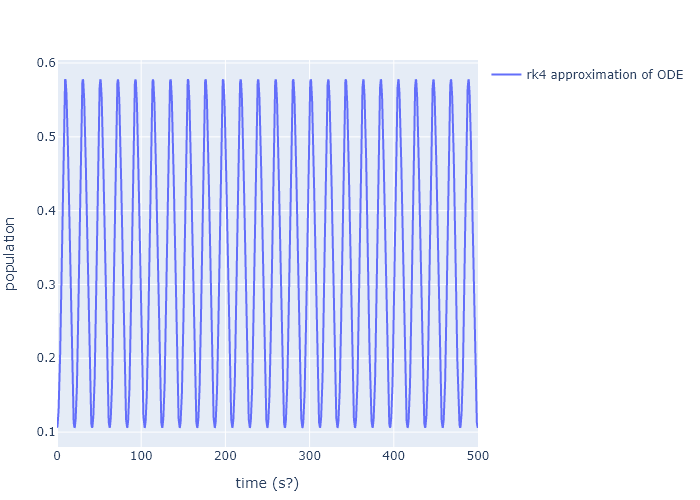

In [112]:
function predprey(u, t)

    # println(u)

    if(!isapprox(length(u), 2.0; atol=eps(Float64), rtol=0))
        throw(error("Please make sure you have entered two initial conditions for the function."))
    end

    a = 1
    b = 0.2
    d = 0.1
    x = u[1]    
    y = u[2]
    
    x_dot = x.*(1-x)- (a.*x.*y)./(d + x)
    y_dot = b.*y.*(1 - (y./x))
    
    return [x_dot y_dot]
end

t = 0:0.1:500
u0 = [.57787148 .2861488]
u0 = [0.106039 0.184191]


include("visualisation.jl")

plot_ode(predprey, u0, t, ["time (s?)" "population"])

Isolate a periodic orbit: a = 1, b = 0.25, d = 0.1

What are its starting conditions?
[1, 1]

What is its period?: 
Roughly 20s


## Week 4 Q2

In [114]:
include("ode_solver.jl")
function G(f, u0, t0, T, arg...)

    F = solve_ode(f, u0, [t0 T], rk4_step, 0.001, arg...)
    g = u0 .- F[[end], :]
    return g
end

function shoot(f, u, phase_index=1, arg...)

    u0 = u[:, 1:end .!= end]
    T = u[end]
    
    g_est = G(f, u0, 0, T, arg...)
    f_at_index = f(u0, 0, arg...)[phase_index]
    
    return [g_est f_at_index]
end


function find_limit_cycle(f, u0, T, phase_index=1, arg...)

    U = [u0 T]
    solution = nlsolve((u) -> shoot(f, u), U).zero

    u01 = solution[:, 1:end-1]
    T1 = solution[end]

    return u01, T1
end

# find_limit_cycle((u,t) -> predprey(u,t), [-1 0], 6)

find_limit_cycle (generic function with 2 methods)

In [ ]:
u0 = [1.0 1.0]
T = 10

U = [u0 T]
nlsolve((u) -> shoot(predprey, u), [1.0 1 21])

In [116]:
include("ode_solver.jl")
G(predprey, [1 1], 0, 10)

1×2 Matrix{Float64}:
 0.439739  0.890485

In [118]:
fhdjskflg = shoot(predprey, [1 1 10])


1×3 Matrix{Float64}:
 0.439739  0.890485  -0.909091

In [23]:

# U = [u0 T]

G(predprey, [1 1], 0, 10.0)
# shoot(predprey, [1 1 10])


1×2 Matrix{Float64}:
 0.439739  0.890485

In [113]:
find_limit_cycle(predprey, [0.35 0.35], 21)

1×3 Matrix{Float64}:
 0.577871  0.286149  20.8169